# Import Libraries 

In [1]:
# major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os ,joblib , missingno

#sklearn

from sklearn.model_selection import train_test_split ,cross_val_score , cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , LabelEncoder ,OneHotEncoder ,PolynomialFeatures
from sklearn.pipeline import Pipeline ,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

from sklearn.linear_model import LinearRegression ,SGDRegressor ,Ridge ,Lasso , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor ,VotingRegressor

#Tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from xgboost import XGBRegressor
 

from sklearn.metrics import mean_squared_error


# Read Dataset

In [2]:
PATH = os.path.join(os.getcwd() ,'housing.csv')
df = pd.read_csv(PATH)

# show the head
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# statestcis

In [3]:
# show some information about dataset
df.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there is null in total_bedrooms

In [5]:
#show stactical values
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 no.samples = 20640
 there are 207 nulls in bedrooms_total
 all features are numerical (float64) except 'ocean_proximity' are categorical


# EDA

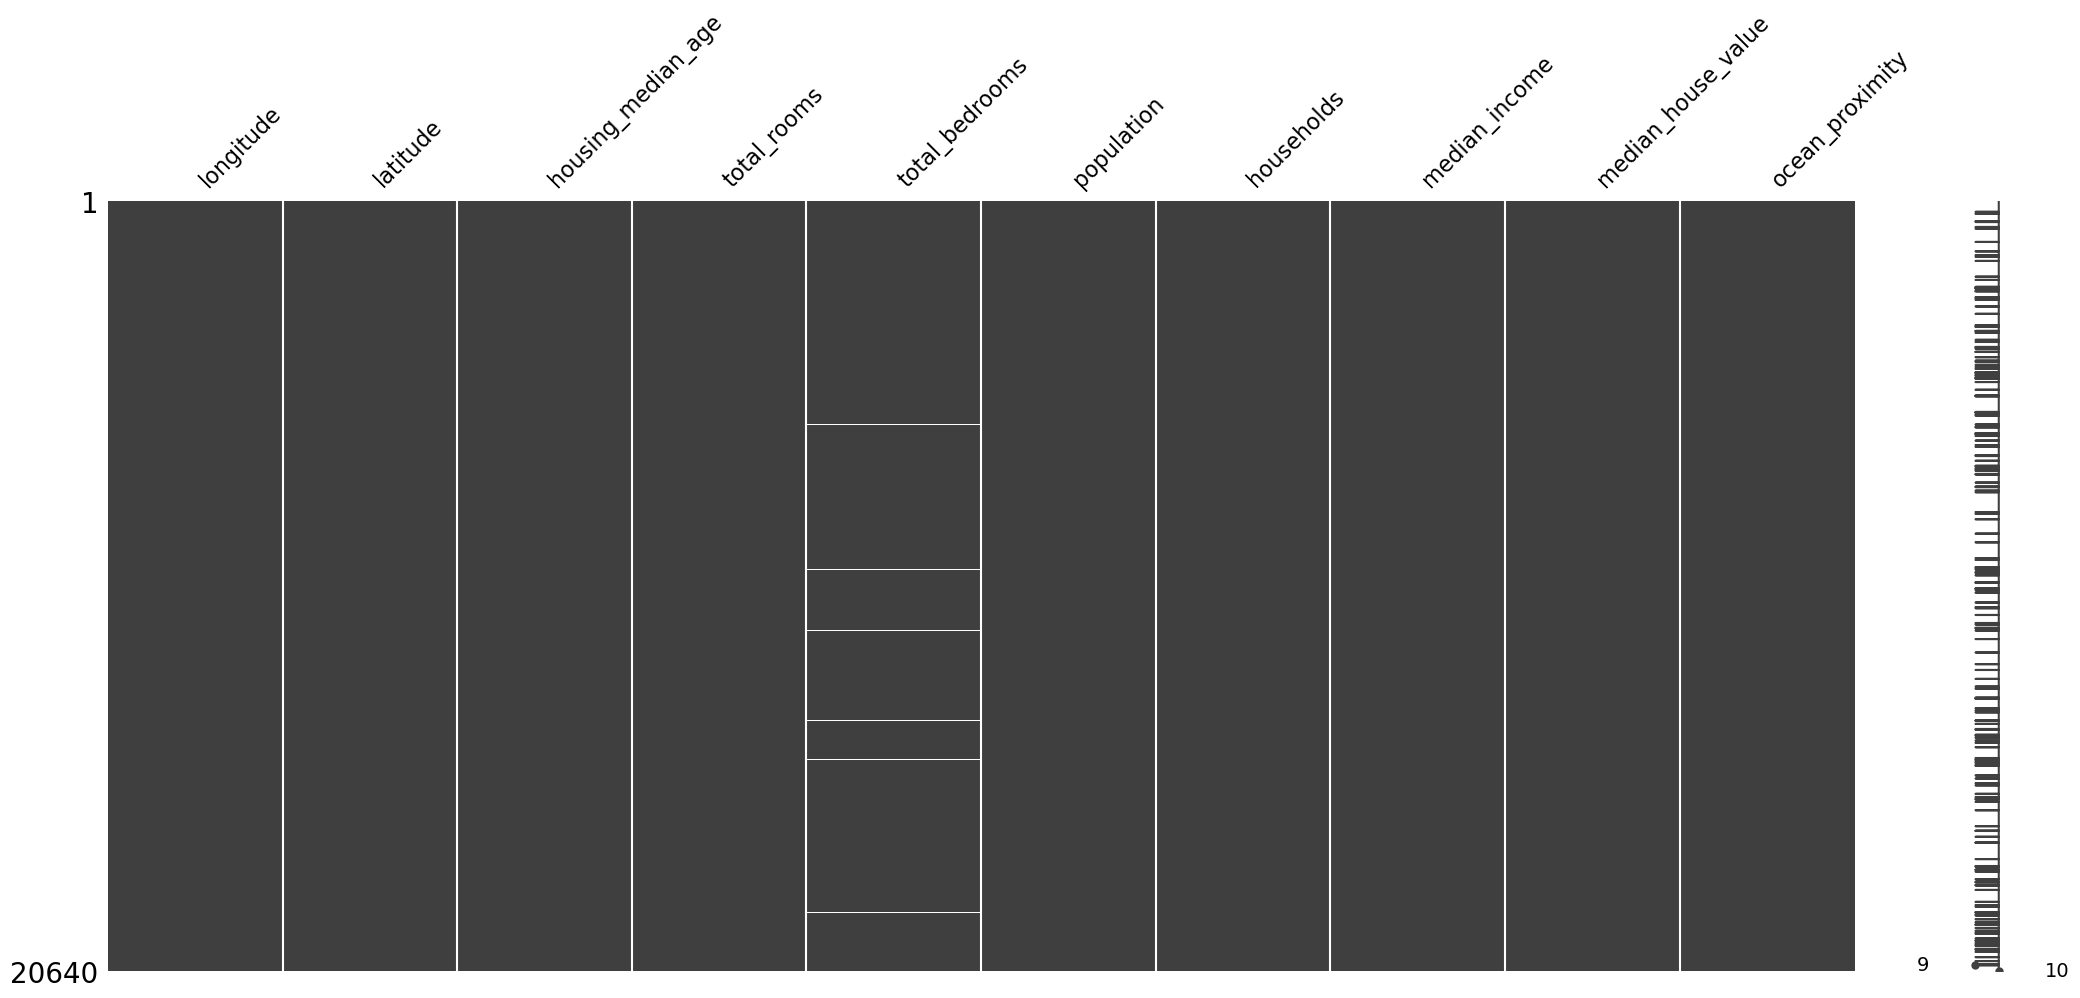

In [9]:
# check nulls using missingno
missingno.matrix(df)
plt.show()

# univariate visualization

In [12]:
# show unique values in 'ocean_proximity' column
ocean_vals = df['ocean_proximity'].unique()
ocean_vals

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [13]:
#return descending order for every category and its sum
replicates = df['ocean_proximity'].value_counts() 
replicates.index

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

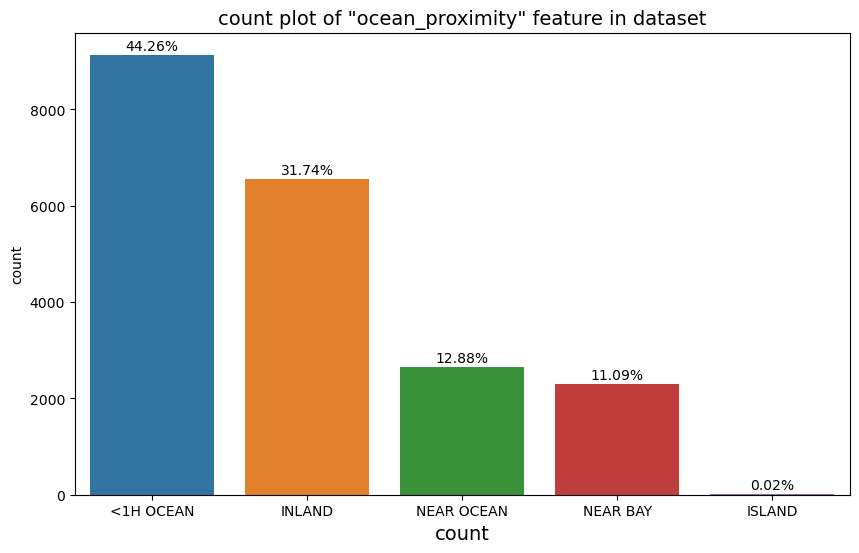

In [14]:
# values count to the ocean_proximity column
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity' ,data =df ,order = replicates.index)
plt.title('count plot of "ocean_proximity" feature in dataset' ,fontsize =14 ,c='k')
plt.xlabel('ocean_proximity' , fontsize =14 ,c='k')
plt.xlabel('count' , fontsize =14 ,c='k')

#To write percentage on bar
for i in range(len(replicates)):
    val =replicates.values[i]
    percent = f'{val*100/len(df):.2f}%'
    plt.text(x =i ,y= val+100 ,s=percent ,ha ='center')

In [16]:
# remove unvalid character in column name
df['ocean_proximity'] = df['ocean_proximity'].replace('<1H OCEAN' , '1H OCEAN')

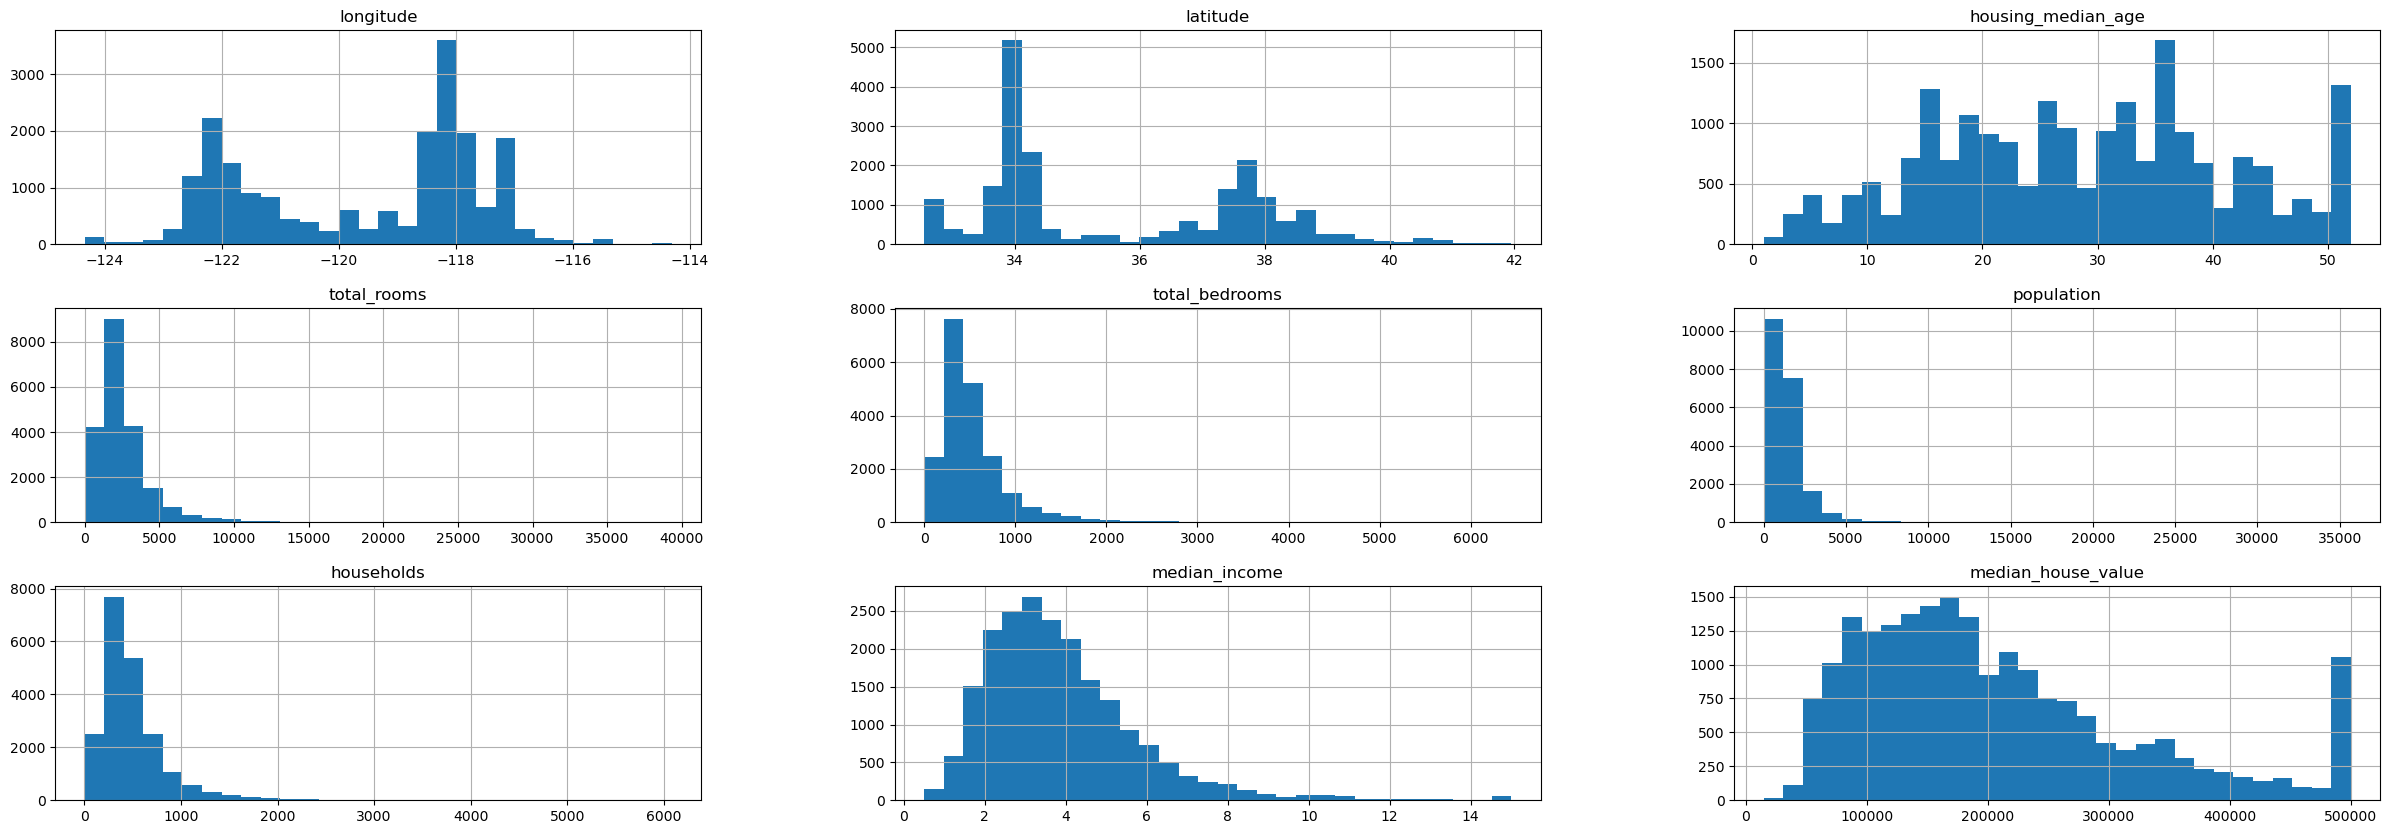

In [17]:
# histograms
df.hist(bins =30 ,figsize=(30,10))
plt.show()

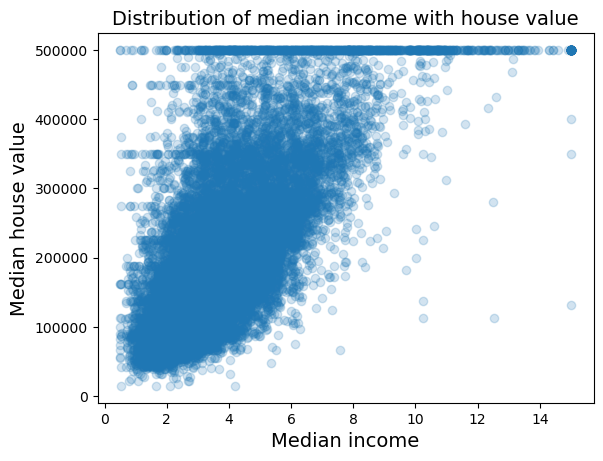

In [18]:
# scatter median income
plt.scatter(df['median_income'] ,df['median_house_value'],alpha = 0.2)
plt.title('Distribution of median income with house value' ,fontsize=14 ,c='k')
plt.xlabel('Median income' ,fontsize=14 ,c='k')
plt.ylabel('Median house value' ,fontsize=14 ,c='k')
plt.show()

In [19]:
# divide house values into ranges
house_val_bins = pd.cut(x = df['median_house_value'] ,bins= [-np.inf , 100000 , 200000 ,300000 ,400000 ,500000 ,np.inf] ,
      labels =[ '0-100k' ,'100k -200k' ,'200k -300k','300k -400k' ,'400k -500k' ,'500k - inf'])
house_val_bins.unique()

['400k -500k', '300k -400k', '200k -300k', '100k -200k', '0-100k', '500k - inf']
Categories (6, object): ['0-100k' < '100k -200k' < '200k -300k' < '300k -400k' < '400k -500k' < '500k - inf']

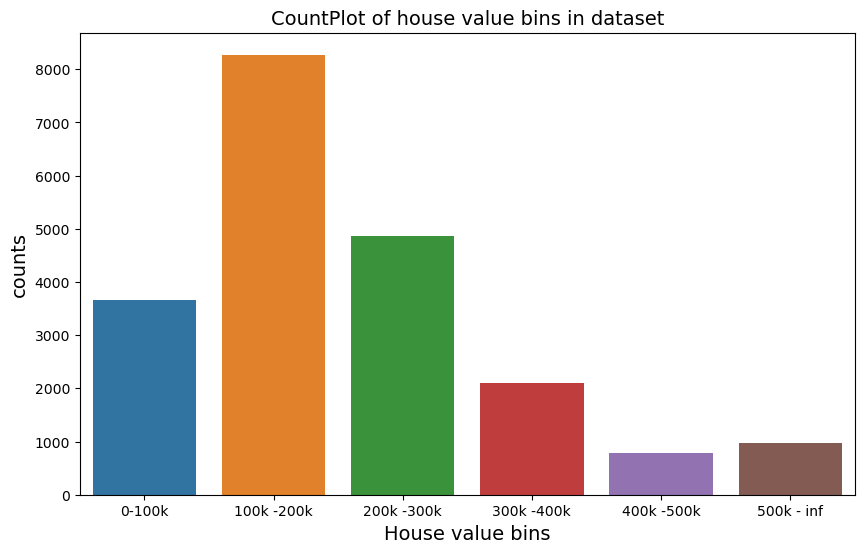

In [20]:
# values count to houses value
plt.figure(figsize=(10,6))
sns.countplot(x = house_val_bins)
plt.title('CountPlot of house value bins in dataset' ,fontsize =14 ,c='k')
plt.xlabel('House value bins' ,fontsize =14 ,c='k')
plt.ylabel('counts' ,fontsize=14 ,c ='k')
plt.show()

In [21]:
# divide median income into ranges
income_bins = pd.cut(x = df['median_income'] ,bins= [-np.inf , 1.5 , 3 ,4.5 ,6 ,np.inf] ,
      labels =[ '0-1.5' ,'1.5 -3' ,'3 -4.5','4.5 - 6' ,'>6'])
income_bins.unique()

['>6', '4.5 - 6', '3 -4.5', '1.5 -3', '0-1.5']
Categories (5, object): ['0-1.5' < '1.5 -3' < '3 -4.5' < '4.5 - 6' < '>6']

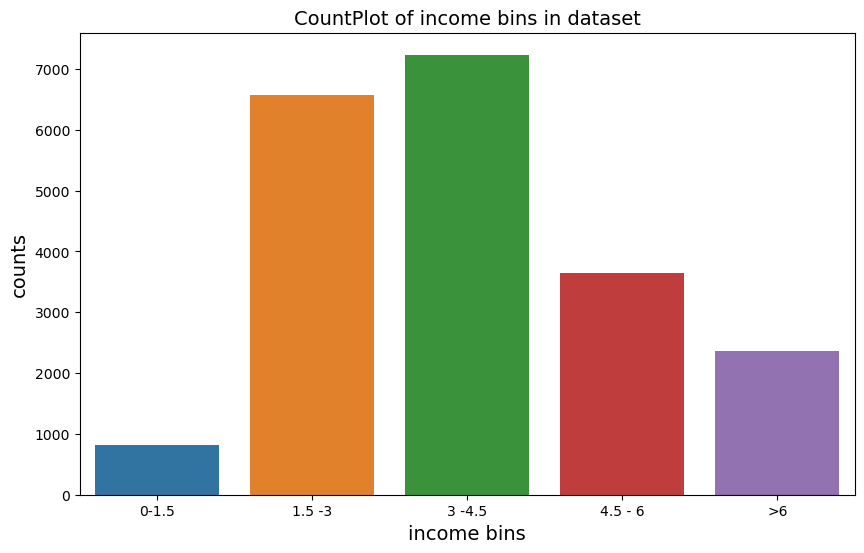

In [22]:
# count value of the median income 
plt.figure(figsize=(10,6))
sns.countplot(x = income_bins)
plt.title('CountPlot of income bins in dataset' ,fontsize =14 ,c='k')
plt.xlabel('income bins' ,fontsize =14 ,c='k')
plt.ylabel('counts' ,fontsize=14 ,c ='k')
plt.show()

# Bivariate Visualization

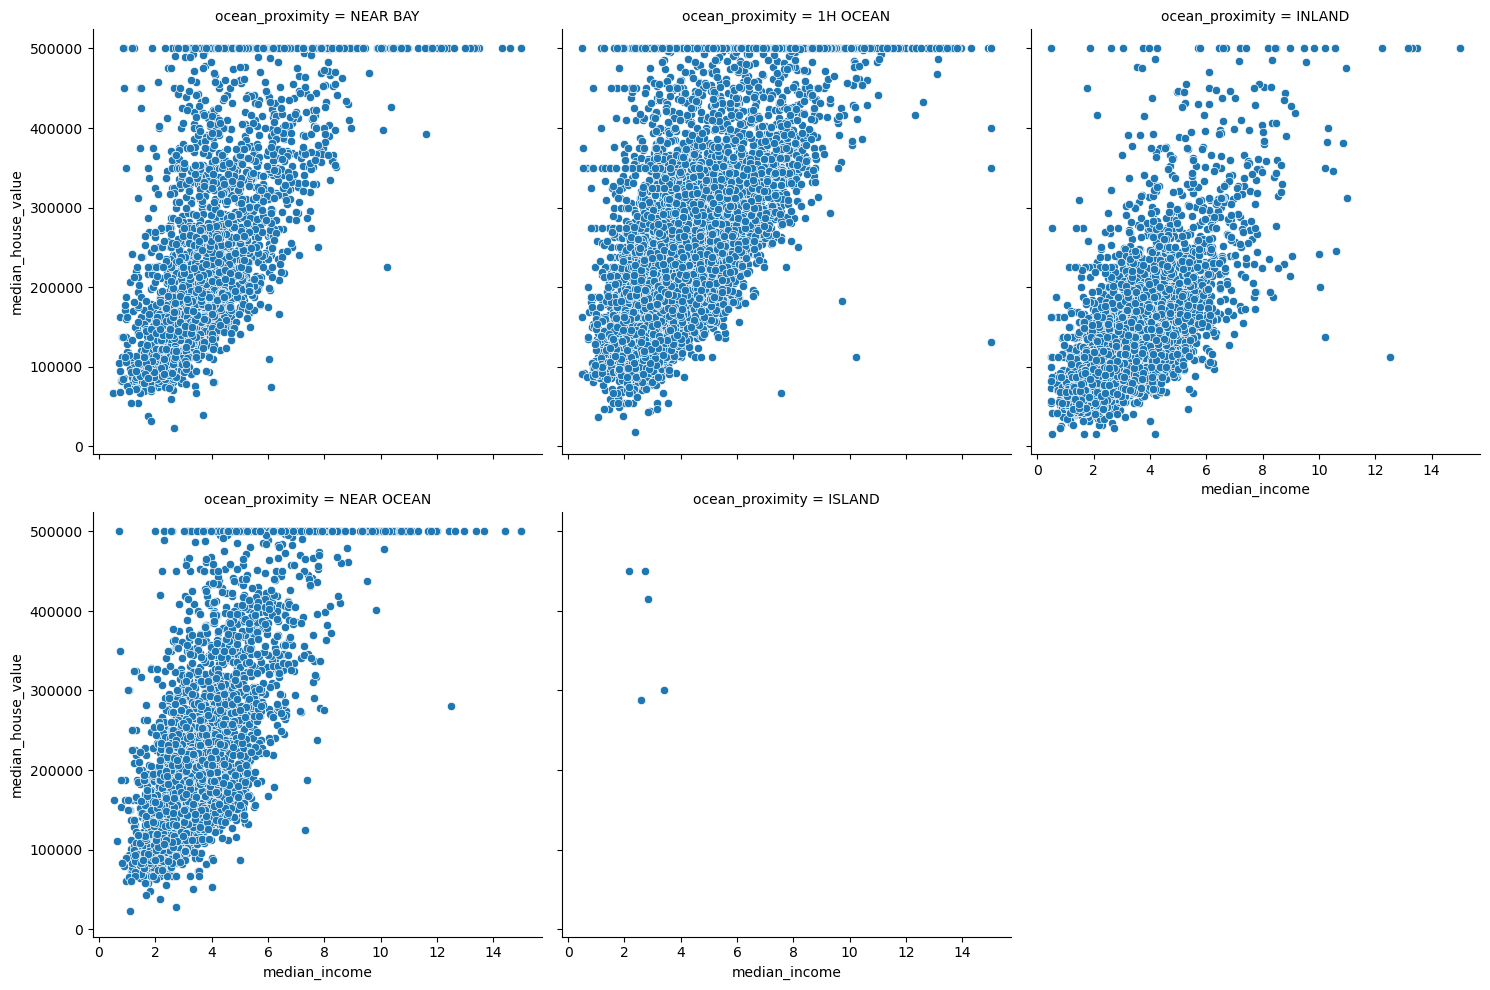

In [23]:
# scatter plot between the 'median_income' column and 'median_house_value' by 'ocean_proximity'
sns.relplot(x ='median_income' , y='median_house_value' ,data =  df,  col = 'ocean_proximity',col_wrap = 3);

''' Diffrence values in ocean_proximty don`t affect in corelation between income and house value'''

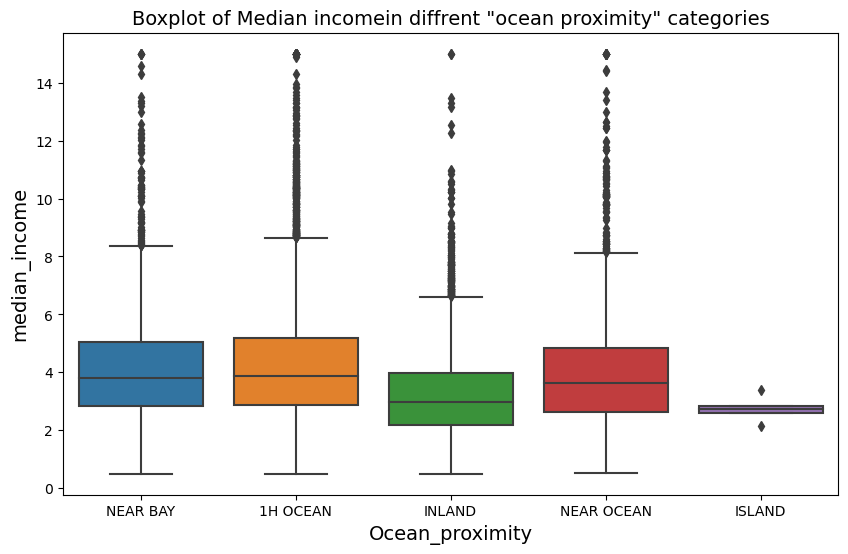

In [24]:
# box plot to show the outliers between the ocean_proximity and the median_income
plt.figure(figsize=(10,6))
sns.boxplot(y='median_income' , data = df , x='ocean_proximity')
plt.title('Boxplot of Median incomein diffrent "ocean proximity" categories' ,fontsize =14 ,c='k')
plt.xlabel('Ocean_proximity' ,fontsize =14 ,c ='k')
plt.ylabel('median_income' ,fontsize =14 ,c= 'k')
plt.show()

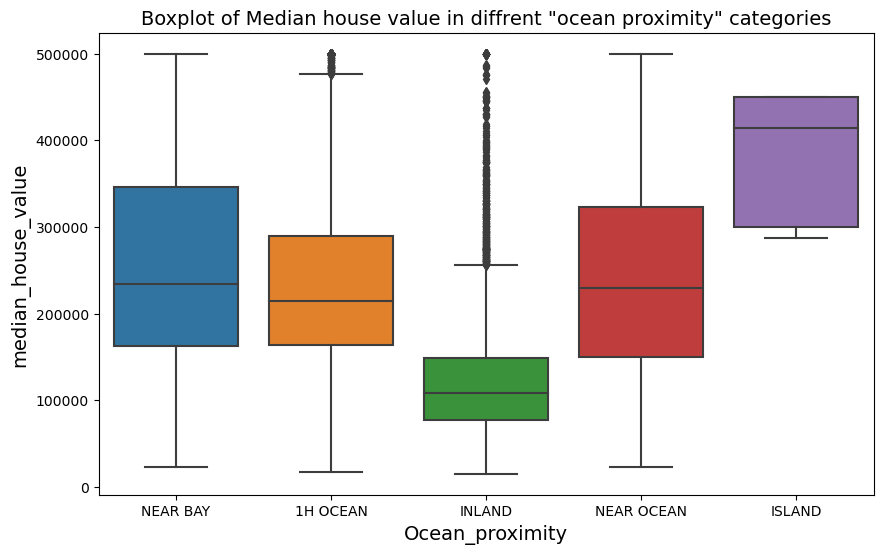

In [25]:
# box plot to show the outliers between the ocean_proximity and the median_house_value
plt.figure(figsize=(10,6))
sns.boxplot(y='median_house_value' , data = df , x='ocean_proximity')
plt.title('Boxplot of Median house value in diffrent "ocean proximity" categories' ,fontsize =14 ,c='k')
plt.xlabel('Ocean_proximity' ,fontsize =14 ,c ='k')
plt.ylabel('median_house_value' ,fontsize =14 ,c= 'k')
plt.show()

''' ocean proximity not important feature'''

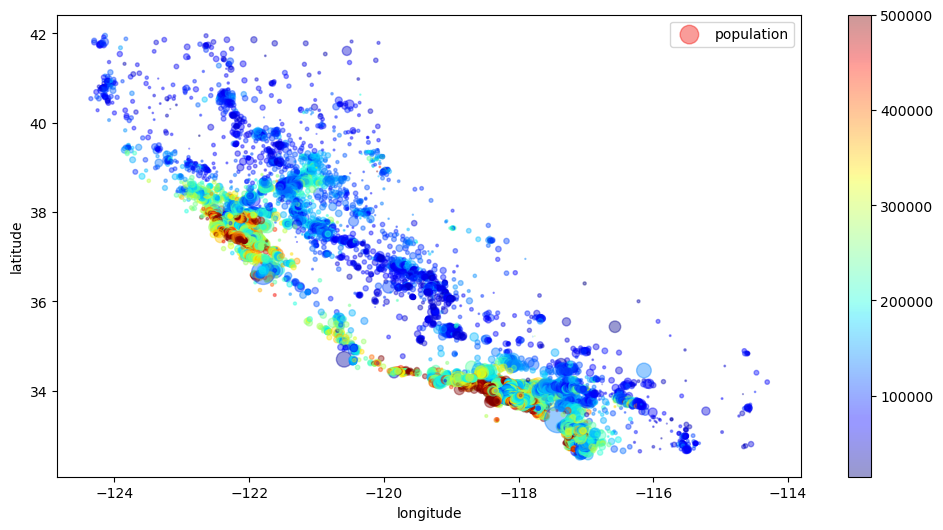

In [26]:
# scatter plot beteween longitude and latitude to show the median_house_value
plt.figure(figsize = (12,6))

sc = plt.scatter(df['longitude'] , df['latitude'] ,alpha =0.4, cmap =plt.get_cmap('jet') ,
                 c= df['median_house_value'],s=df['population'] /100 ,label ='population')
plt.colorbar(sc)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()

In [28]:
# correlation between columns
df.corr()

C:\Users\fagr\AppData\Local\Temp\ipykernel_22184\3461463039.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [29]:
# correlation between columns and median_house_value
df.corr()['median_income'].sort_values(ascending = False)

C:\Users\fagr\AppData\Local\Temp\ipykernel_22184\331125424.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['median_income'].sort_values(ascending = False)


median_income         1.000000
median_house_value    0.688075
total_rooms           0.198050
households            0.013033
population            0.004834
total_bedrooms       -0.007723
longitude            -0.015176
latitude             -0.079809
housing_median_age   -0.119034
Name: median_income, dtype: float64

C:\Users\fagr\AppData\Local\Temp\ipykernel_22184\531451904.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot =True ,cbar = False , cmap ='Blues')


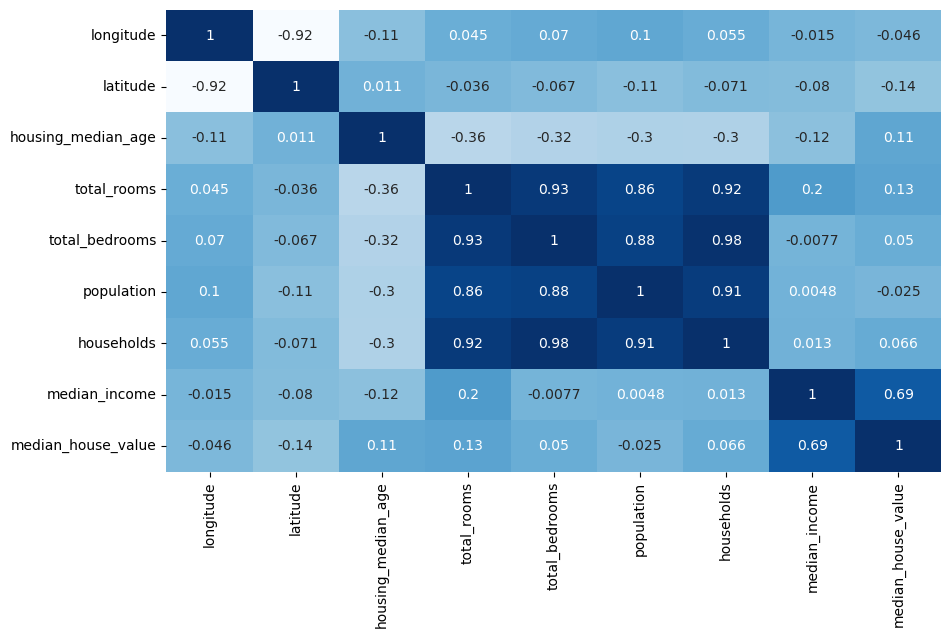

In [30]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr() , annot =True ,cbar = False , cmap ='Blues')
plt.show()

# Feature Engineering

In [31]:
# extract new feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_rooms'] = df['total_bedrooms'] /df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [32]:
# show correlation between columns and median_house_value
df.corr()['median_house_value'].sort_values(ascending = False)

C:\Users\fagr\AppData\Local\Temp\ipykernel_22184\2054643011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['median_house_value'].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

# Split Dataset

In [34]:
# split to features & target
x = df.drop('median_house_value' ,axis =1)
y = df['median_house_value']
# shape of features
x.shape

(20640, 12)

In [35]:
# split to train & test
x_train , x_test , y_train ,y_test = train_test_split(x , y ,test_size = 0.15 ,shuffle =True , random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17544, 12)
(17544,)
(3096, 12)
(3096,)


# Dealing with Nulls

In [36]:
# numerical columns
num_cols = [col for col in x_train.columns if x_train[col].dtype in ['float64' , 'int64' , 'float32' , 'int32']]
# categorical columns
categ_cols = [col for col in x_train.columns if x_train[col].dtype not in ['float64' , 'int64' , 'float32' , 'int32']]

In [37]:
## TOTAL PIPLINE
pip_num = Pipeline(steps = [
    ('selector' ,DataFrameSelector(num_cols)) ,
    ('impute' , SimpleImputer(strategy = 'median')) ,
    ('scaler' , StandardScaler())
])

pip_categ = Pipeline(steps= [
    ('selector' ,DataFrameSelector(categ_cols)) ,
    ('impute' , SimpleImputer(strategy = 'constant' , fill_value = 'missing')),
    ('onh' , OneHotEncoder(sparse_output = False))
])

#concatenate numerical & categorical columns
total_pip =FeatureUnion(transformer_list = [
    ('num_pipline' ,pip_num ) ,
    ('categ_pipline' ,pip_categ)
])

total_pip.fit(x_train)
x_train_final = total_pip.transform(x_train)
x_test_final = total_pip.transform(x_test)

# Building Model

cost function : RMSE

# 1.Linear Regression

In [38]:
# apply linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train_final ,y_train)


LinearRegression()

In [39]:
# mean square error
mse_reg = cross_val_score(estimator= lin_reg , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
mse_reg = -1 *mse_reg
Rmse = np.sqrt(mse_reg)
Rmse.mean()

67880.14257788868

In [40]:
# predict x_train
y_pred_reg = cross_val_predict(estimator = lin_reg ,X =x_train_final ,y =y_train ,cv =5
                            ,n_jobs =-1 ,method ='predict')
y_pred_reg

array([184295.23244419, 230100.88200316, 145096.2664977 , ...,
       195094.05173242, 278871.44475451, 272476.85764427])

In [41]:
Rsme = np.sqrt(mean_squared_error(y_train , y_pred_reg))
Rsme

67898.88872785706

# 2.SGDRegressor

In [45]:
# apply sgdregressor
sgd_reg = SGDRegressor(penalty='l2' ,alpha =0.0001 ,shuffle =True ,max_iter =10000 ,eta0=0.001)
sgd_reg.fit(x_train_final ,y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [46]:
# apply cross validation & estimate mean square error
sgd_reg = cross_val_score(estimator= sgd_reg , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
sgd_reg = -1 *sgd_reg
Rmse = np.sqrt(sgd_reg)
Rmse.mean()

68003.59273296417

# RandomForest

In [50]:
# apply random forest
randforest_reg = RandomForestRegressor(n_estimators= 150 ,max_depth= 6 ,random_state=42 ,max_samples= 0.8)
randforest_reg.fit(x_train_final ,y_train)

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150,
                      random_state=42)

In [51]:
randforest_reg_score = cross_val_score(estimator= randforest_reg , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
randforest_reg_score = -1 *randforest_reg_score
Rmse = np.sqrt(randforest_reg_score)
Rmse.mean()

59969.67796450624

# TUNING

In [52]:
dict_par ={ 'n_estimators' : np.arange(100,500,50) ,
            'max_depth' : np.arange(4,20,2),
            'max_samples' : [0.7 ,0.8, 0.9, 1]
          }

search_randforest = RandomizedSearchCV(estimator=randforest_reg ,param_distributions=dict_par ,n_iter =20 ,random_state =42 
                   ,cv =5 , scoring ='neg_mean_squared_error' ,verbose =6)

In [53]:

search_randforest.fit(x_train_final ,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2387240950.516 total time= 1.2min
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2762446681.621 total time= 1.2min
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2648935103.247 total time= 1.2min
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2417353818.788 total time= 1.2min
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=300;, score=-2538817122.387 total time= 1.2min
[CV 1/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4334005984.350 total time=  19.2s
[CV 2/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4593725450.025 total time=  19.8s
[CV 3/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4514789699.529 total time=  19.7s
[CV 4/5] END max_depth=4, max_samples=0.7, n_estimators=400;, score=-4340436187.570 total time=  19.3s
[CV 5/

[CV 5/5] END max_depth=8, max_samples=0.7, n_estimators=300;, score=-3163105351.405 total time=  32.8s
[CV 1/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2400224852.719 total time= 1.7min
[CV 2/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2764315256.804 total time= 1.7min
[CV 3/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2653233236.403 total time= 1.7min
[CV 4/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2423457596.285 total time= 1.7min
[CV 5/5] END max_depth=16, max_samples=0.7, n_estimators=450;, score=-2553564248.378 total time= 1.7min
[CV 1/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4349316458.530 total time=  24.9s
[CV 2/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4609289274.238 total time=  24.3s
[CV 3/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=-4537898367.163 total time=  24.6s
[CV 4/5] END max_depth=4, max_samples=0.8, n_estimators=450;, score=

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=6)

In [54]:
search_randforest.best_params_

{'n_estimators': 200, 'max_samples': 0.9, 'max_depth': 18}

In [55]:
best_forest = search_randforest.best_estimator_

In [56]:
# apply random forest using best parameter
rmse_tuned_model = cross_val_score(estimator= best_forest , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
rmse_tuned_model = -1 *rmse_tuned_model
Rmse = np.sqrt(rmse_tuned_model)
Rmse.mean()

50325.71803874934

In [57]:
feat_import_forest ={}
for name ,score in zip(num_cols ,best_forest.feature_importances_[:11]):
    feat_import_forest[name] = score

In [58]:
key_forest = feat_import_forest.keys()
vals_forest = feat_import_forest.values()

In [59]:
df_best = pd.DataFrame({'features':key_forest , 'scores': vals_forest})
df_best = df_best.sort_values(by='scores', ascending=False)
df_best

,features,scores
7,median_income,0.480359
10,population_per_household,0.122523
0,longitude,0.056506
1,latitude,0.055941
2,housing_median_age,0.043663
8,rooms_per_household,0.025361
9,bedrooms_per_rooms,0.023948
3,total_rooms,0.012460
4,total_bedrooms,0.011364
5,population,0.011165


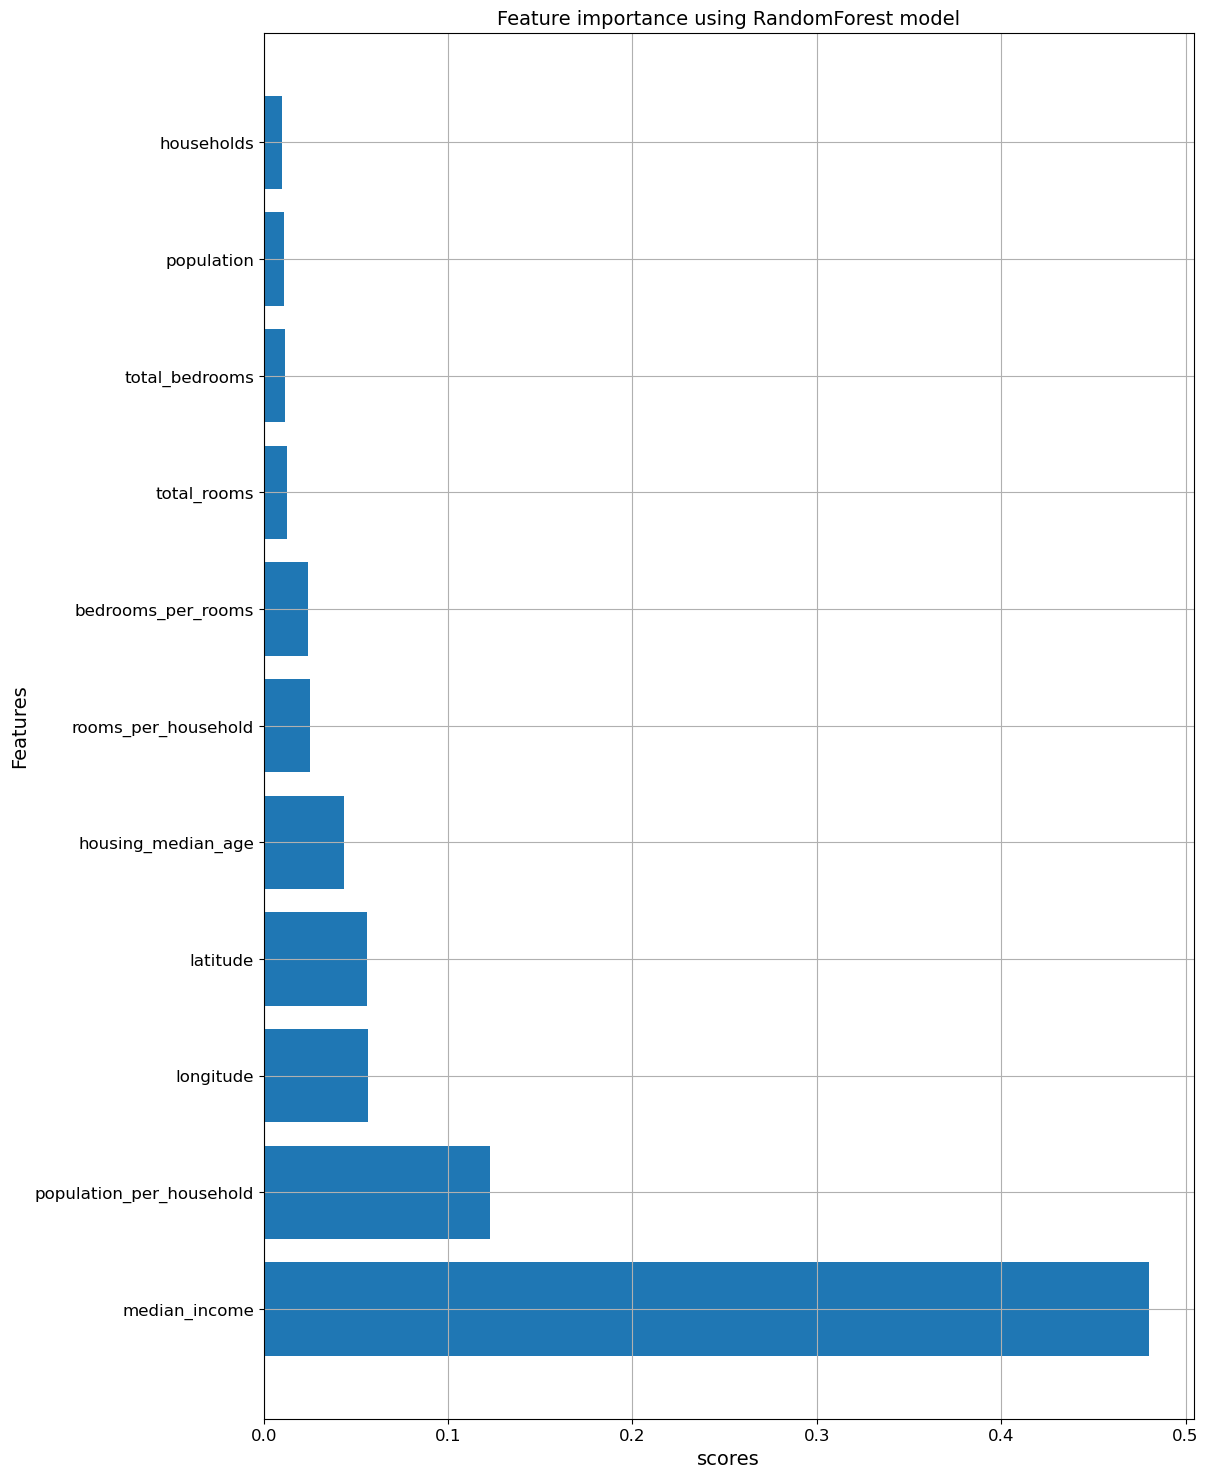

In [60]:
plt.figure(figsize=(12,18))
plt.barh(y=df_best['features'] ,width=df_best['scores'])
plt.title('Feature importance using RandomForest model' ,fontsize=14 ,c ='k')
plt.xlabel('scores' ,fontsize=14 ,c = 'k')
plt.ylabel('Features' ,fontsize=14 ,c = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid('on')
plt.show()

# XGBOOST

In [61]:
# apply xgboost model
xgb_reg = XGBRegressor(n_estimators=100 ,max_depth= 6 ,learning_rate =0.1 ,subsample =0.8)
xgb_reg.fit(x_train_final ,y_train)

xgb_reg_score = cross_val_score(estimator= xgb_reg , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
xgb_reg_score = -1 *xgb_reg_score
Rmse = np.sqrt(xgb_reg_score)
Rmse.mean()

47292.39633959996

tuning xgboost parameters

In [62]:
params_dict = {'n_estimators': np.arange(100,200,50) ,
              'max_depth':np.arange(4,15,2) ,
               'learning_rate': [0.1 ,0.2],
               'subsample' : [0.8 ,0.9]
              }

grid_xgb = GridSearchCV(estimator=xgb_reg ,cv =5 , param_grid = params_dict ,n_jobs =-1,
                        verbose =6 ,scoring = 'neg_mean_squared_error')

grid_xgb.fit(x_train_final ,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [63]:
#best parameters of xgboost model
grid_xgb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}

In [64]:
# apply xgboost using best parameters
best_xgb = grid_xgb.best_estimator_

xgb_best_score = cross_val_score(estimator= best_xgb , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
xgb_best_score = -1 *xgb_best_score
Rmse = np.sqrt(xgb_best_score)
Rmse.mean()

46047.293489999676

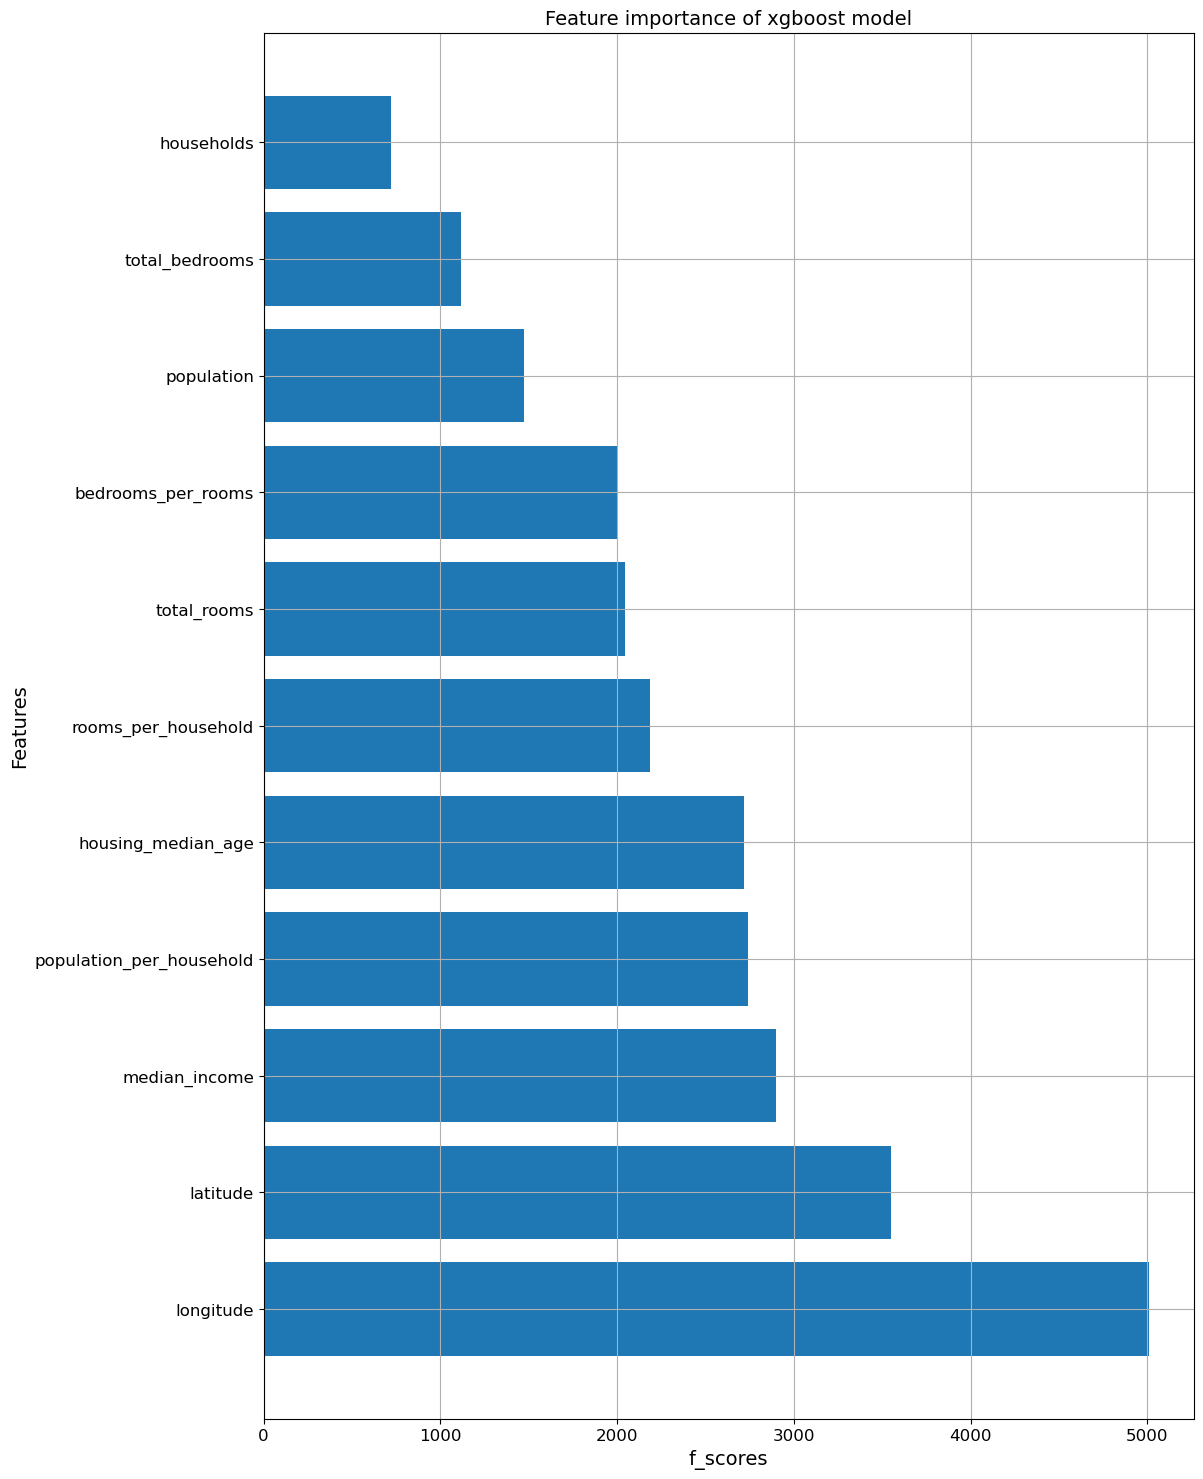

In [65]:
feat_import_xgb = best_xgb.get_booster().get_score(importance_type = 'weight')
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb ,orient ='index')
df_feat_import_xgb =df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns ={'index' : 'features' ,0: 'f_scores'})

df_feat_import_xgb = df_feat_import_xgb[:11]

df_feat_import_xgb['features'] = num_cols
df_feat_import_xgb = df_feat_import_xgb.sort_values(by = 'f_scores' ,ascending =False)



plt.figure(figsize=(12,18))
plt.barh(y=df_feat_import_xgb['features'] ,width=df_feat_import_xgb['f_scores'])
plt.title('Feature importance of xgboost model' ,fontsize=14 ,c ='k')
plt.xlabel('f_scores' ,fontsize=14 ,c = 'k')
plt.ylabel('Features' ,fontsize=14 ,c = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid('on')
plt.show()

# VotingRegressor

In [ ]:
voting_reg = VotingRegressor(estimators =[
    ('tuned_randforest' ,best_forest),
    ('tuned_xgb' , grid_xgb)
])

voting_reg.fit(x_train_final ,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
voting_score = cross_val_score(estimator= voting_reg , X = x_train_final ,y = y_train 
                               ,cv =5 ,n_jobs =-1 ,scoring = 'neg_mean_squared_error')
voting_score = -1 *voting_score
Rmse = np.sqrt(voting_score)
Rmse.mean()

# Apply on test datasrt

In [ ]:
y_pred_test = voting_reg.predict(x_test_final)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_test))